## Let's Begin

In [178]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from vecstack import stacking
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LassoCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler


warnings.filterwarnings('ignore')
%matplotlib inline

## Import Data and Take a look at some Features

In [28]:
#Importing data and looking at big picture for our dataset

data = pd.read_csv('data.csv')
print('Number of instances: ',data.shape[0])
print('Number of features: ', data.shape[1])
print()
print('Examples of some Features: ',list(data.columns)[1:10])
data.head(5)

Number of instances:  18207
Number of features:  89

Examples of some Features:  ['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall', 'Potential', 'Club']


,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [29]:
#Dropping completely unnecessary columns before starting EDA (i.e. images of the player's country flag, club logo, etc)
data.drop(columns=['Unnamed: 0', 'Photo','Flag', 'Club Logo'],inplace=True)

## Change label (Wage) from a String to an INT

In [30]:
#The Wage column was inputted as an object so need to transform them into numbers

data['Wage']=[i.split('€')[1].split('K')[0] for i in data['Wage']]
data['Wage'] = data['Wage'].astype('int')
data = data.rename(columns = {'Wage':'Wage (000s)'}) #changed the column name to indicate the numbers are in thousands
data


,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage (000s),Special,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,565,2202,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,405,2228,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,290,2143,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,Spain,91,93,Manchester United,€72M,260,1471,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,355,2281,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
5,183277,E. Hazard,27,Belgium,91,91,Chelsea,€93M,340,2142,...,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,€172.1M
6,177003,L. Modrić,32,Croatia,91,91,Real Madrid,€67M,420,2280,...,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,€137.4M
7,176580,L. Suárez,31,Uruguay,91,91,FC Barcelona,€80M,455,2346,...,85.0,62.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,€164M
8,155862,Sergio Ramos,32,Spain,91,91,Real Madrid,€51M,380,2201,...,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,€104.6M
9,200389,J. Oblak,25,Slovenia,90,93,Atlético Madrid,€68M,94,1331,...,70.0,27.0,12.0,18.0,86.0,92.0,78.0,88.0,89.0,€144.5M


In [31]:
# see how many numerical and categorical variables we have currently
categorical = len(data.dtypes[data.dtypes =='object'])
numerical = len(data.dtypes[data.dtypes !='object'])
print('Number of Categorical Variables: ',categorical)
print('Number of Numerical Variables: ',numerical)


Number of Categorical Variables:  41
Number of Numerical Variables:  44


# Exploratory Data Analysis

### Basic stats of player's Wages 

count    18207.000000
mean         9.731312
std         21.999290
min          0.000000
25%          1.000000
50%          3.000000
75%          9.000000
max        565.000000
Name: Wage (000s), dtype: float64

Wage (000s)
0     241
1    4900
2    2827
3    1857
4    1255
5     869
Name: Wage (000s), dtype: int64


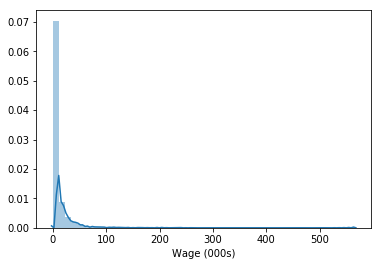

In [32]:
# Let's take a look at the wages as a whole. 
print(data['Wage (000s)'].describe())
print()
# the mean only stands at 9.73 despite having players like Messi earn over 560. This indicates a majority of players
# that are less well-known have very low wages. 


print(data.groupby('Wage (000s)')['Wage (000s)'].count().head(6))
# you can see here that a total of ~10,000 players earn less than €5,000 which is what's bringing down our mean. 


sns.distplot(data['Wage (000s)'])

# you can see this is severly positively skewed. We will apply a log transformation later to fix this issue
# This is mainly due to the the superstars that earn so much more comparatively than their lesser-known peers

## Initial Correlation Matrix (Heatmap)

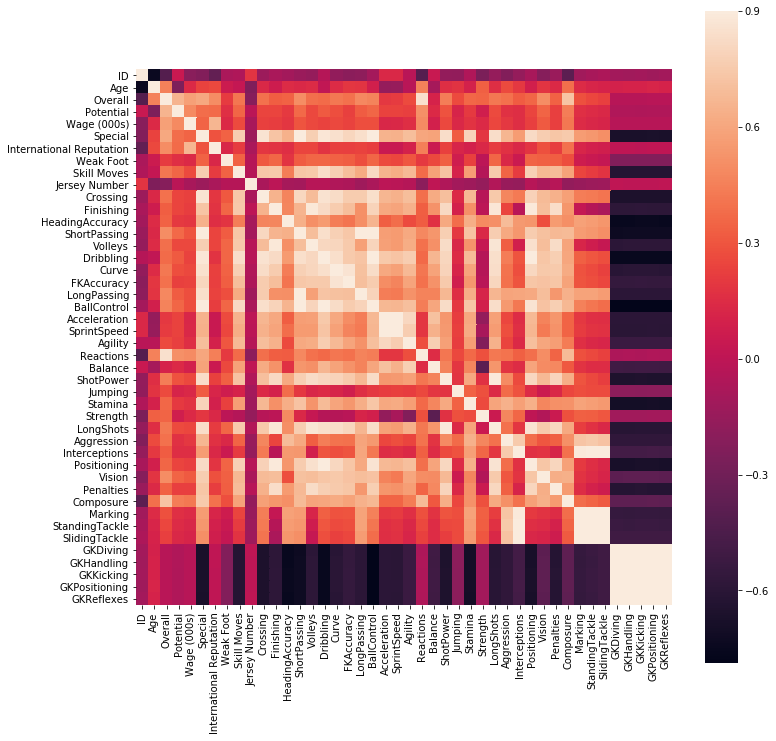

In [33]:
corrmat = data.corr()
plt.subplots(figsize=(12,12))
sns.heatmap(corrmat, vmax=0.9, square=True);

#Right off the bat, you notice big white squares on the bottom right of the heatmap which indicates high correlation (multicollinearity)

# You can see all GK attributes (reflexes, diving, positioning) are all highly correlated meaning if you're a GK, you
# will likely score high on all these points relative to players in other positions. 

#you can also see 'Marking' has high correlation with the Tackles (a trait associated mostly for defenders)
# if you're a defender, you will most likely have a higher score in these features than attacking forwards


## 10 highest correlation

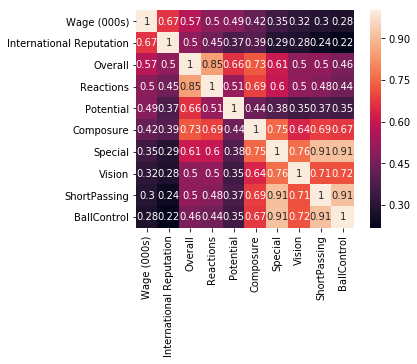

In [34]:
newcorr = corrmat['Wage (000s)'].sort_values(ascending=False)[:10].index

sns.heatmap(data[newcorr].corr(),annot=True, square= True,);

# #Just from an initial standpoint, we see that international reputation is the biggest indicator of a player's wage. 




## Wage against a player's Age (in their 20s)

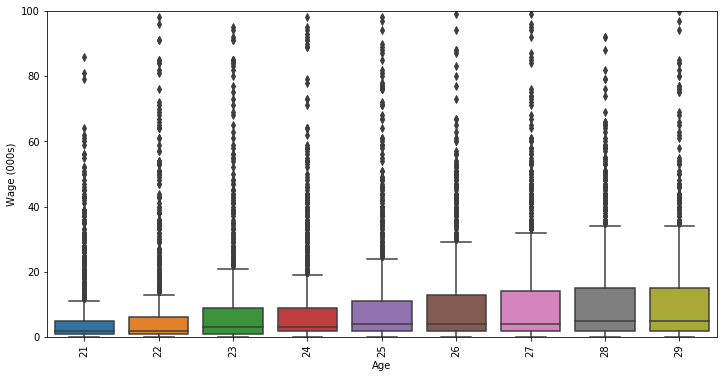

In [35]:
# Lets take a look at a couple variables that I personally think contributes to higher wage. 
plt.subplots(figsize=(12,6))
plt.xticks(rotation=90)
newage = data[(data['Age']>20) & (data['Age']<30)]

plt.ylim(0, 100)

sns.boxplot(newage['Age'],newage['Wage (000s)'])

# we're only looking at wages for the ages between 20 and 30. You can see on average, the older you get, the higher 
#your wage will be. This makese intuitive sense. The more experience you can acquire playing the game, the higher your 
# value should be (hence higher income). I've excluded the outliers because it's not a good representation of the rest 
# of the players due to superstar wages like Messi and Ronaldo. 

## Wage against Overall Rating (above 80)

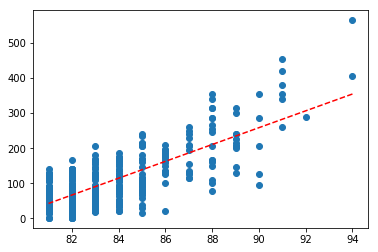

In [36]:
overall_data = data[(data['Overall']>80)&(data['Overall']<100)]
plt.scatter(overall_data['Overall'],overall_data['Wage (000s)'])

#get the average line
z = np.polyfit(overall_data['Overall'],overall_data['Wage (000s)'] ,1)
p = np.poly1d(z)

plt.plot(overall_data['Overall'],p(overall_data['Overall']),"r--");


# Overall score of a player also has a positive correlation to the wages they earn. 

#There are other factors but i'd like to get through data preprocessing before we talk about more. 

## Preprocessing Data (missing data, multicolinearity, categorical transformation, etc)

In [37]:
# Get rid of multicollinearity issues
# GKDiving, GKHandling, GKPositioning, GKReflexes are all indications of whether a player is a GK or not. 
#Therefore we will delete all columns and only keep GKReflexes (which I believe is the best indicator of a quality GK)
columns = ['GKDiving','GKHandling','GKKicking','GKPositioning',]
data.drop(columns =columns, axis = 1, inplace=True)

In [38]:
# Another Multicollinearity issues regarding 'Marking','Sliding Tackle','Standing Tackle'. 
# We will take the average of the 3 and rename the column 'Defense Points' - and drop the original three
data['Defense Points']=data[['Marking','StandingTackle','SlidingTackle']].mean(axis = 1).apply(lambda x: round(x,2))
columns = ['Marking','SlidingTackle','StandingTackle']
data.drop(columns = columns, axis = 1, inplace=True)


## we can drop the following for these reasons:
    Id: arbitrary ID assigned to each player
    
    Special: was given no explanation on what these numbers mean
    
    Work Rate: was given no explanation
    
    Body Type: Don't think a 'lean body' and a 'normal body' was a big differentiator when it comes to someone's wage
    
    Real Face: was given no explanation
    
    Joined: Players move teams all the time. Joined date on the player's current team will not be a big indicator (Take Cristiano Ronaldo for example, he is the world's best but joined Juventus in 2018 vs. Messi joining his life-long club Barcelona in 2004)
    
    Loaned From: Irrelevant
    
    Contract Valid Until: not a big factor that contributes to determining wage
    
    Release Clause: some relevance to a player's value so wanted to avoid any multicollinearity issues


In [39]:
# we can drop the followID and Special because they are purely
delete_col = ['ID','Special','Work Rate', 'Body Type', 'Real Face','Joined', 'Loaned From', 'Contract Valid Until',
             'Release Clause']
data.drop(columns = delete_col, axis = 1, inplace=True)

## MISSING DATA

In [40]:
missing =pd.DataFrame(data.isnull().sum(), columns = ['Missing Data'])
missing = missing.sort_values('Missing Data',ascending=False)
print(missing)
#You can see consistencies in 2085 of the players missing the same information. 
#Let's take a look and delete since we can't really impute the data here.. (we can't make up their positional skills) 

missing_1 = data[data['RDM'].isnull()] # this is the one with 2085 players missing 
print(missing_1['Position']) #you can see here that every single one of the 2085 players having null values are GKs. 
# we will go ahead and delete these 2085 instances 

missing_gk = missing_1.index
data.drop(missing_gk,axis = 0,inplace=True)
#This shows us that all of the 2085 missing data comes from players that are GoalKeepers. That makes sense.. There 
#wouldn't be any need to score Goalkeepers on their skills as a "RDM" or "Right Defensive Mid"
#For this case, we will go ahead and delete all 2085 instances and move forward without any goalkeepers in our dataset



                          Missing Data
RDM                               2085
CF                                2085
RW                                2085
CAM                               2085
RAM                               2085
LM                                2085
LCM                               2085
CM                                2085
RCM                               2085
RM                                2085
LWB                               2085
LDM                               2085
CDM                               2085
RWB                               2085
LB                                2085
LCB                               2085
CB                                2085
RCB                               2085
RB                                2085
RF                                2085
LAM                               2085
LF                                2085
RS                                2085
LW                                2085
ST                       

In [41]:
# Deleting those 2085 goalkeepers data seems to have fixed all but one of our null value issues. 
print(data.isnull().sum().sort_values(ascending=False).head(5))

#you can see now there is only one category left with null values. It is 'Club' and we will go ahead and replace them 
#with 'None'

data['Club']=data['Club'].fillna(value='None')

data.columns[data.isnull().sum() > 0]
#Now we have no Null Values. 

Club              196
Defense Points      0
CAM                 0
LW                  0
LF                  0
dtype: int64


Index([], dtype='object')

## One Hot Encode Positions (ST, LW, CAM, etc)

In [42]:
ohe = OneHotEncoder(sparse = False)
df = pd.DataFrame(ohe.fit_transform(data[['Position']]), columns = ohe.get_feature_names(), index = data.index)
df.drop(columns = 'x0_CAM',inplace=True )
data = pd.concat([data,df],axis=1)
data.drop(columns = ['Position'],axis=1,inplace=True)
#drop one of the OneHotEncoded columns and merge it back to the original DataFrame
#also drop the original 'Position' column

## Change height to cm, change weight to numeric only, take out the plus sign in all position rating (i.e. ST for messi is 88+2 --> change this to just 88)

In [43]:
# Weight to numeric
data['Weight']=data['Weight'].apply(lambda x: x[:-3])
data['Weight'].head(5)

0    159
1    183
2    150
4    154
5    163
Name: Weight, dtype: object

In [44]:
# Change height to cm
def ChangeHeight(x):
    feet=int(x.split("\'")[0])
    inches =int(x.split("\'")[1])
    return (feet*30.48) + (inches*2.54)

data['Height'] = data['Height'].apply(ChangeHeight)
data['Height'].head(5)



0    170.18
1    187.96
2    175.26
4    180.34
5    172.72
Name: Height, dtype: float64

In [45]:
#Take out the plus sign in each of the position ratings
cols = ['LS','ST','RS','LW','LF','CF','RF','RW','LAM','CAM','RAM','LM','LCM','CM','RCM','RM','LWB',
        'LDM','CDM','RDM','RWB','LB','LCB','CB','RCB','RB']

for col in cols:
    data[col] = data[col].apply(lambda x: x.split('+')[0])


    

In [46]:
# set the DataFrame index to the player's names
data = data.set_index('Name')

## Delete 4 more variables that aren't indicative of Wage (Nationality, Club, Preferred Foot, Value)
#### before that though, I'd like to check a couple things 

<BarContainer object of 10 artists>

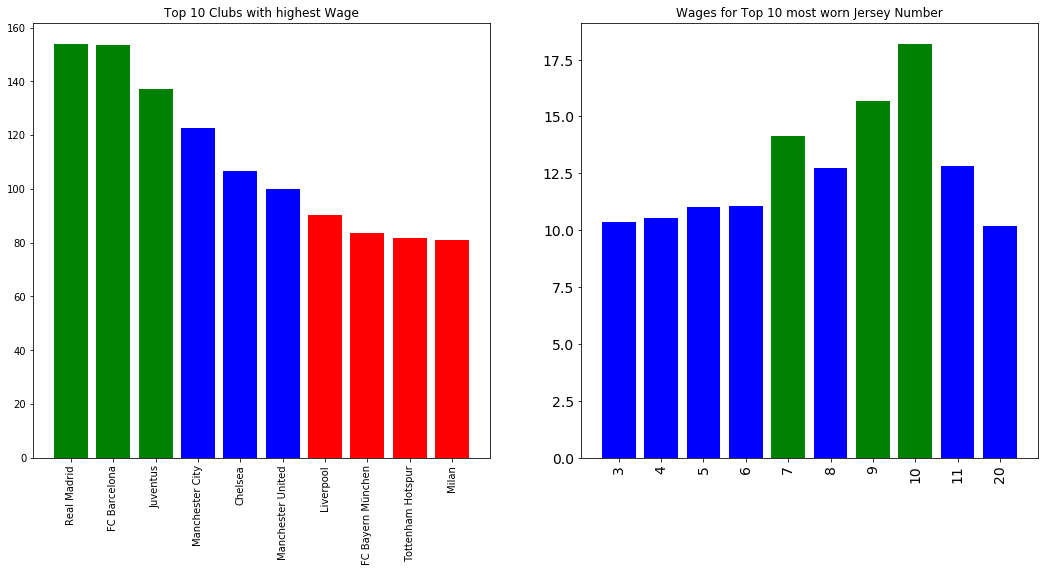

In [47]:
club = data.groupby('Club')['Wage (000s)'].mean().sort_values(ascending=False)[:10] #Top 10 clubs with highest avg Wage

jersey = pd.Series(data.groupby('Jersey Number').size().sort_values(ascending=False).nlargest(10).index).astype('str')
jersey_series = data.groupby('Jersey Number')['Wage (000s)'].mean()
jersey_final =jersey_series[jersey_series.index.isin(jersey)].reset_index() #Wage by the Top 10 most worn Jersey Number
jersey_final['Jersey Number'] = jersey_final['Jersey Number'].astype('str').apply(lambda x:x.split('.')[0])


fig, ax = plt.subplots(1,2,figsize =(18,8))
ax[0].set_title('Top 10 Clubs with highest Wage')
plt.sca(ax[0])
plt.xticks(rotation=90)
ax[0].bar(club.index,club.values,color='gggbbbrrrr')

plt.sca(ax[1])
ax[1].set_title('Wages for Top 10 most worn Jersey Number')
plt.xticks(rotation=90)
plt.tick_params(labelsize=14)
ax[1].bar(jersey_final['Jersey Number'],jersey_final['Wage (000s)'],color = 'bbbbgbggbb')


# As you can see, if you play for any of the top 10 teams listed on the left graph, you're most likely goign to get paid out
# Also, historically speaking, Jersey #10 is worn by the best player on the team. The chart on the right shows that 
#the wages paid to a Number 10 is on average higher than any other numbers worn. Number 7 and 9 are highly sought after too


In [48]:
# delete the 4 variables: Nationality, Club, Preferred Foot, Value
data.drop(columns = ['Nationality', 'Club','Preferred Foot','Value'],axis = 1, inplace=True)


## Log Transformation of Wage 

In [49]:
# data['Wage (000s)'] = np.log(data['Wage (000s)'])
# data['Wage (000s)'].head()

In [50]:
#Let's try making the distribution plot again for the Wage

# data['Wage (000s)'] = data['Wage (000s)'].apply(lambda x: round(x,2))
# data['Wage (000s)']= data['Wage (000s)'].replace(float('-inf'),0)


# sns.distplot(list(data['Wage (000s)']))
# not  but better than the first distplot we made earlier 

## Split into Train Test

In [51]:
X = data.drop('Wage (000s)',axis=1)
y = data['Wage (000s)']

In [52]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, test_size = 0.25)

## Setup CV (cross-validation)

In [115]:
n = 6
kf = KFold(n_splits = n, shuffle=True, random_state = 1)

def CVS(model):
    results = (-cross_val_score(model, Xtrain, ytrain, cv = kf, scoring='neg_mean_squared_error'))
    return results, results.mean()

In [183]:
rf = RandomForestRegressor(n_estimators=350,
                          max_depth=15,
                          min_samples_split=3,
                          min_samples_leaf=2,
                          max_features=None,
                          oob_score=True,
                          random_state=42)

gbr = GradientBoostingRegressor(loss='huber',
                                learning_rate=0.01,
                                n_estimators=5000,
                                min_samples_leaf=15,
                                min_samples_split=10,
                                max_depth=4,
                                max_features='auto',
                                random_state=42)  

lr = make_pipeline(RobustScaler(), Lasso(alpha =0.0005))





In [184]:
CVS(rf)


(array([11.55572014, 10.33823309, 10.70026951, 10.3110003 , 11.59051746,
        12.5053508 ]), 11.166848548488856)

In [102]:
CVS(gbr)

In [182]:
CVS(lr)

(array([13.86884687, 14.80215193, 16.302545  , 16.02403821, 14.9552363 ,
        16.73773574]), 15.448425675013132)

In [118]:
model_1 = rf.fit(Xtrain,ytrain)
print('R-Squared Score for Random Forest model: {:.3f}'.format(rf.score(Xtrain, ytrain)))

model_2 = gbr.fit(Xtrain,ytrain)
print('R-Squared Score for Gradient Boosting model: {:.3f}'.format(gbr.score(Xtrain,ytrain)))

model_3 = lr.fit(Xtrain,ytrain)
print('R-Squared Score for Lasso Regression model: {:.3f}'.format(lr.score(Xtrain,ytrain)))




R-Squared Score for Random Forest model: 0.944
R-Squared Score for Gradient Boosting model: 0.901
R-Squared Score for Lasso Regression model: 0.550


In [186]:
ypred = model_1.predict(Xtest)
print(np.sqrt(mean_squared_error(ytest,ypred)))

ypred1= model_2.predict(Xtest)
print(np.sqrt(mean_squared_error(ytest,ypred1)))

ypred2= model_3.predict(Xtest)
print(np.sqrt(mean_squared_error(ytest,ypred2)))

10.349249866449782
10.672364899487567
15.561066164546597


## STACKING BOTH MODELS


In [ ]:
pip install vecstack

In [187]:
models = [RandomForestRegressor(n_estimators=350,
                          max_depth=15,
                          min_samples_split=3,
                          min_samples_leaf=2,
                          max_features=None,
                          oob_score=True,
                          random_state=42),

GradientBoostingRegressor(loss='huber',
                                learning_rate=0.01,
                                n_estimators=5000,
                                min_samples_leaf=15,
                                min_samples_split=10,
                                max_depth=4,
                                max_features='auto',
                                random_state=42),
Lasso(alpha =0.0005)

]

In [189]:
S_train, S_test = stacking(models,                   
                           Xtrain, ytrain, Xtest,   
                           regression=True,      
                           mode='oof_pred_bag', 
                           needs_proba=False,
                           save_dir=None, 
                           metric=mean_squared_error,
                           n_folds=4, 
                           stratified=False,
                           shuffle=True,  
                           random_state=0,    
                           verbose=2)

task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [RandomForestRegressor]
    fold  0:  [141.34393428]
    fold  1:  [115.28937774]
    fold  2:  [137.77873863]
    fold  3:  [108.83357326]
    ----
    MEAN:     [125.81140598] + [13.99496667]
    FULL:     [125.81281015]

model  1:     [GradientBoostingRegressor]
    fold  0:  [173.52629389]
    fold  1:  [123.36429906]
    fold  2:  [146.51741559]
    fold  3:  [111.79945055]
    ----
    MEAN:     [138.80186477] + [23.62606881]
    FULL:     [138.80409804]

model  2:     [Lasso]
    fold  0:  [288.20097420]
    fold  1:  [201.98531069]
    fold  2:  [246.65673851]
    fold  3:  [204.31339537]
    ----
    MEAN:     [235.28910469] + [35.34659211]
    FULL:     [235.29166657]



In [190]:
model = GradientBoostingRegressor(loss='huber',
                                learning_rate=0.01,
                                n_estimators=5000,
                                min_samples_leaf=15,
                                min_samples_split=10,
                                max_depth=4,
                                max_features='auto',
                                random_state=42) 

model = model.fit(S_train,ytrain)
ypred_final = model.predict(S_test)
print(np.sqrt(mean_squared_error(ytest,ypred_final)))


10.659808183682006


In [191]:
yprediction = pd.Series(ypred_final, index = Xtest.index)

In [195]:
finals = pd.concat([yprediction,ytest],keys = ['pred','actual'],axis=1)
finals.sample(frac=0.01)

,pred,actual
Name,,
O. Özyakup,29.615630,47
M. Smith,1.503140,2
M. Wittek,6.871406,5
S. Nakamura,12.088118,4
B. Mokulu,5.234558,3
R. Zobnin,36.502800,1
C. McDermott,1.529180,1
Álvaro Gómez,1.494735,1
Álex Mozo,2.583719,4


Text(0, 0.5, 'Actual')

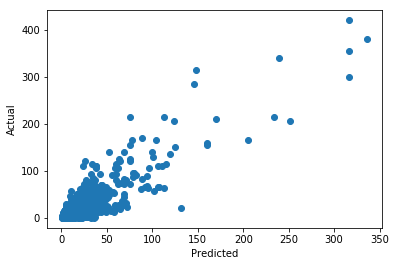

In [197]:
plt.scatter(finals['pred'],finals['actual'])
plt.xlabel('Predicted',)
plt.ylabel('Actual')


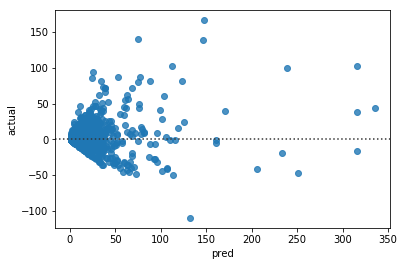

In [202]:
# Residual Plot
sns.residplot(finals['pred'],finals['actual'],robust=True)